In [1]:
# 시파10이 아닙니다. 사이파10 입니다

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# cifar10 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

- 이거 컬러인가?

# 진짜 컬러였네~~

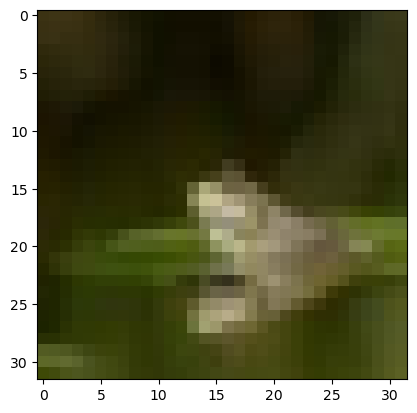

In [4]:
plt.imshow(x_train[25000])
plt.show()

In [5]:
np.unique(y_train, return_counts = True) # 종속변수가 5000개씩있다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [8]:
labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

# 컬러니까 채널 분리 시켜야하나?

In [9]:
x_train.shape

(50000, 32, 32, 3)

# 일단 분리 시키지 않고 드가자

In [10]:
np.unique(x_train, return_counts = True)[0] # 이 친구도 255까지 있네여

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
scaled_train = x_train / 255
scaled_test = x_test / 255

In [12]:
# 데이터 분할
scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train,
    y_train, 
    test_size=0.3,
    stratify=y_train,
    random_state=34
)

In [13]:
scaled_train.shape

(35000, 32, 32, 3)

In [14]:
# 35000개의 데이터
# 가로 32, 세로 32, 채널 3

In [15]:
# 맛집 레시피가보자
model = keras.Sequential()

# 입력층
model.add(keras.Input(shape = (32, 32, 3))) # RED 계열만 돌려볼까?

# 합성곱층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding = "same"))

# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

# 두 번째 합성곱 - 풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation="relu", padding= "same"))
model.add(keras.layers.MaxPool2D(2))

# 분류신경망으로 넘겨 ~~~~~==================================================================
model.add(keras.layers.Flatten())

# 과대적합 방지

model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))

# 출력층 ( 이것도 범주가 10개니깐! )
model.add(keras.layers.Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         409,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,102 (1.64 MB)

 Trainable params: 430,102 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
es_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights= True)

# 모델 설정하고 
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

# 적용해라
history = model.fit(
    scaled_train, 
    y_train, 
    epochs=300, 
    validation_data=(scaled_val, y_val), 
    callbacks=[es_cb], 
    batch_size=32
)

Epoch 1/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3527 - loss: 1.7511 - val_accuracy: 0.5047 - val_loss: 1.3798
Epoch 2/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.4730 - loss: 1.4403 - val_accuracy: 0.5639 - val_loss: 1.2260
Epoch 3/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5229 - loss: 1.3116 - val_accuracy: 0.5931 - val_loss: 1.1605
Epoch 4/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5542 - loss: 1.2247 - val_accuracy: 0.6200 - val_loss: 1.0845
Epoch 5/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5802 - loss: 1.1623 - val_accuracy: 0.6349 - val_loss: 1.0261
Epoch 6/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6027 - loss: 1.0988 - val_accuracy: 0.6361 - val_loss: 1.0256
Epoch 7/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6243 - loss: 1.0467 - val_accuracy: 0.6511 - val_loss: 0.9885
Epoch 8/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 

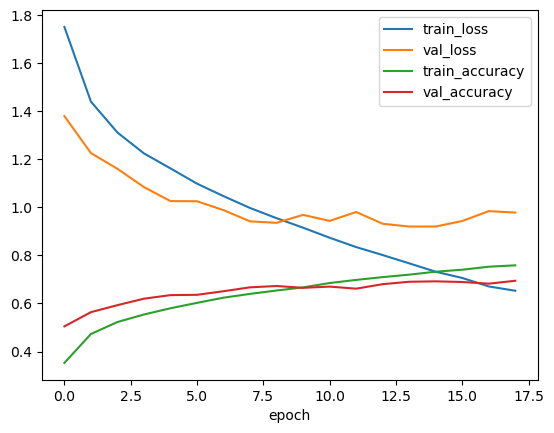

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 맙소사...

### 일반 성능 체크

In [19]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6982 - loss: 0.9193 


[0.9192682504653931, 0.698199987411499]

# ver 2 : 흑백만들기

In [31]:
# cifar10 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

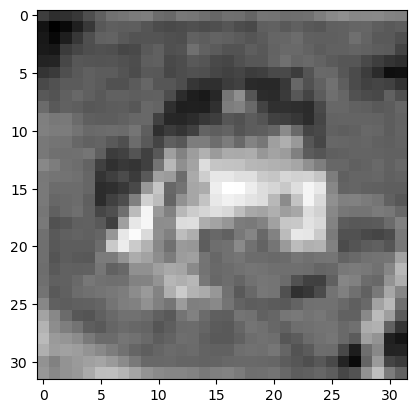

In [32]:
from skimage import color
color.rgb2gray(x_train[0]).shape

plt.imshow(color.rgb2gray(x_train[0]), cmap = 'gray')
plt.show()

In [33]:
x_train = np.array([color.rgb2gray(img) for img in x_train])
x_test = np.array([color.rgb2gray(img) for img in x_test])

In [34]:
x_train.shape

(50000, 32, 32)

In [35]:
# red 계열만... 뽑아 보면 어떰?
scaled_train = x_train.reshape(-1, 32,32,1) / 255
scaled_test = x_test.reshape(-1, 32,32,1) / 255

In [36]:
scaled_train.shape

(50000, 32, 32, 1)

In [37]:
# 데이터 분할
scaled_train, scaled_val, y_train, y_val = train_test_split(
    scaled_train,
    y_train, 
    test_size=0.3,
    stratify=y_train,
    random_state=34
)

In [38]:
# 맛집 레시피가보자
model2 = keras.Sequential()

# 입력층
model2.add(keras.Input(shape = (32, 32, 1)))

# 합성곱층 추가
model2.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding = "same"))

# 풀링층 추가
model2.add(keras.layers.MaxPool2D(2))

# 두 번째 합성곱 - 풀링층 추가
model2.add(keras.layers.Conv2D(64, kernel_size = 3, activation="relu", padding= "same"))
model2.add(keras.layers.MaxPool2D(2))

# 분류신경망으로 넘겨 ~~~~~==================================================================
model2.add(keras.layers.Flatten())

# 과대적합 방지

model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dropout(0.4))

# 출력층 ( 이것도 범주가 10개니깐! )
model2.add(keras.layers.Dense(10, activation = "softmax"))

In [39]:
es_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights= True)

# 모델 설정하고 
model2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

# 적용해라
history2 = model2.fit(
    scaled_train, 
    y_train, 
    epochs=300, 
    validation_data=(scaled_val, y_val), 
    callbacks=[es_cb], 
    batch_size=32
)

Epoch 1/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.0989 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0984 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/300
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 

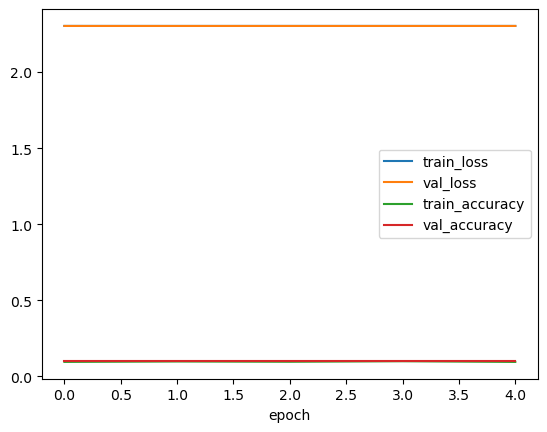

In [29]:
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["val_loss"], label = "val_loss")

plt.plot(history2.history["accuracy"], label = "train_accuracy")
plt.plot(history2.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 성능이 쑤 레 기 가 되었습니다.
- 화질을 개선하면????

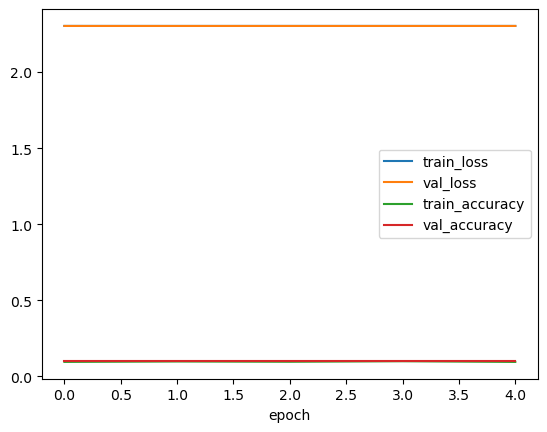

In [30]:
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["val_loss"], label = "val_loss")

plt.plot(history2.history["accuracy"], label = "train_accuracy")
plt.plot(history2.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()